In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import*
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [304]:
df=pd.read_csv('train_csv.csv')

In [305]:
print(df.head())
df.columns

   id                 time  feature
0   0  2019-03-19 00:00:00   237.97
1   1  2019-03-19 00:00:10    57.93
2   2  2019-03-19 00:00:20    90.53
3   3  2019-03-19 00:00:30   260.75
4   4  2019-03-19 00:00:40    49.70


Index(['id', 'time', 'feature'], dtype='object')

In [306]:
dft=pd.read_csv('test_csv.csv')
dft.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


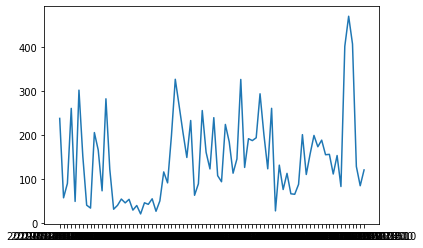

In [307]:
Y=df["feature"]
X=df["time"]
fig=plt.plot(X,Y)
plt.show()

In [308]:
df['space']=np.ones(80)
df.head()

,id,time,feature,space
0,0,2019-03-19 00:00:00,237.97,1.0
1,1,2019-03-19 00:00:10,57.93,1.0
2,2,2019-03-19 00:00:20,90.53,1.0
3,3,2019-03-19 00:00:30,260.75,1.0
4,4,2019-03-19 00:00:40,49.70,1.0


In [309]:
for x in range (len(df["time"])):
    df["space"][x]= (pd.Timestamp(df["time"][x]) - pd.Timestamp('2019-03-19 00:00:00')).total_seconds()
type(df["space"])

df.head(80)


C:\Users\prakash\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,time,feature,space
0,0,2019-03-19 00:00:00,237.97,0.0
1,1,2019-03-19 00:00:10,57.93,10.0
2,2,2019-03-19 00:00:20,90.53,20.0
3,3,2019-03-19 00:00:30,260.75,30.0
4,4,2019-03-19 00:00:40,49.70,40.0
...,...,...,...,...
75,75,2019-03-19 00:12:30,469.72,750.0
76,76,2019-03-19 00:12:40,406.79,760.0
77,77,2019-03-19 00:12:50,128.91,770.0
78,78,2019-03-19 00:13:00,85.28,780.0


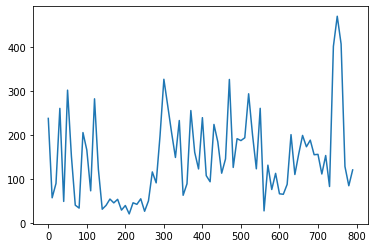

In [310]:
Y=df["feature"]
X=df["space"]
fig=plt.plot(X,Y)
plt.show()

In [311]:
df.reset_index()
df.drop('id',axis=1,inplace=True)

In [312]:
df.drop('space',axis=1,inplace=True)
df

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70
...,...,...
75,2019-03-19 00:12:30,469.72
76,2019-03-19 00:12:40,406.79
77,2019-03-19 00:12:50,128.91
78,2019-03-19 00:13:00,85.28


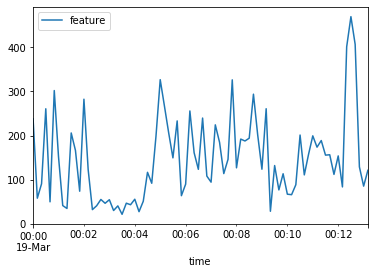

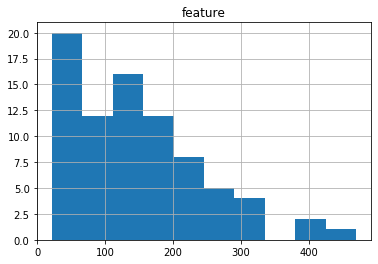

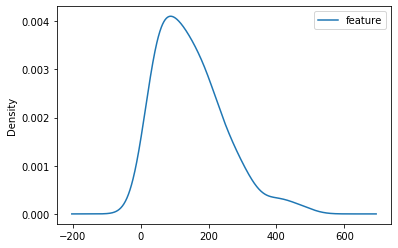

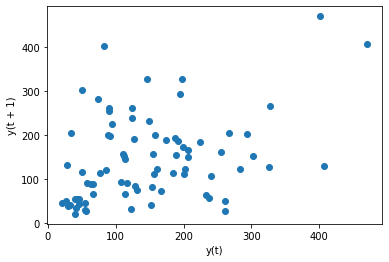

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


In [313]:
series = pd.read_csv('train_csv.csv', header=0, index_col=1, parse_dates=True, squeeze=True)
series.drop('id',axis=1,inplace=True)
series.plot()
series.hist()
series.plot(kind='kde')
plt.show()
pd.plotting.lag_plot(series)
plt.show()
series.head()

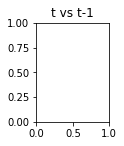

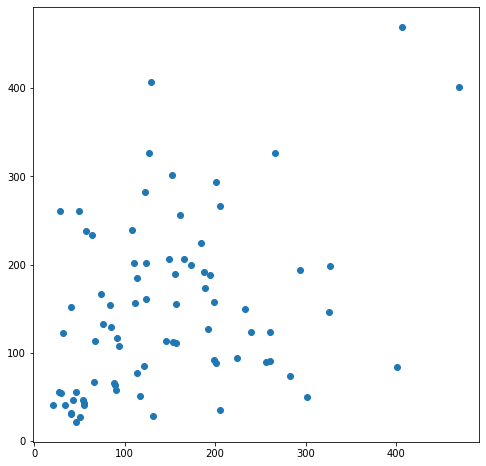

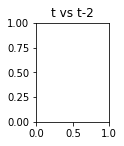

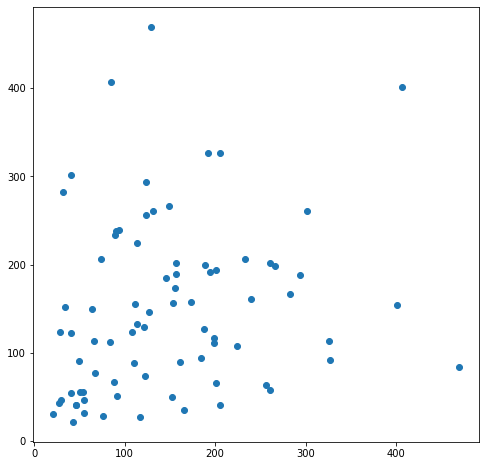

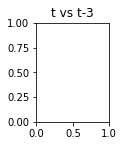

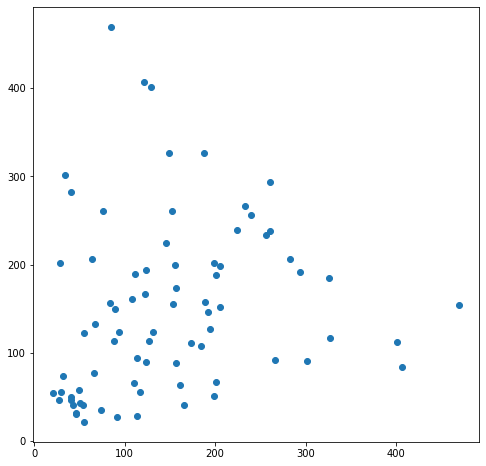

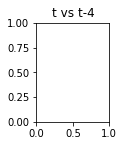

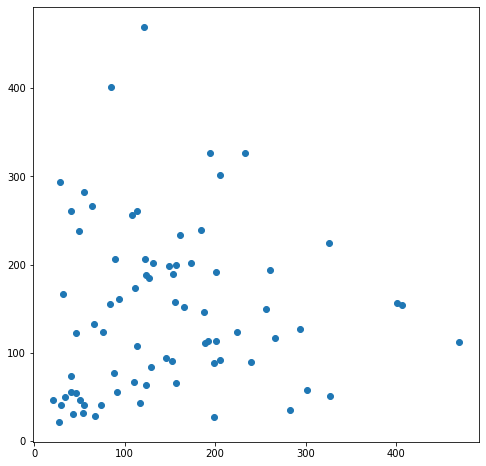

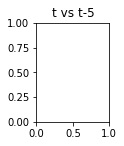

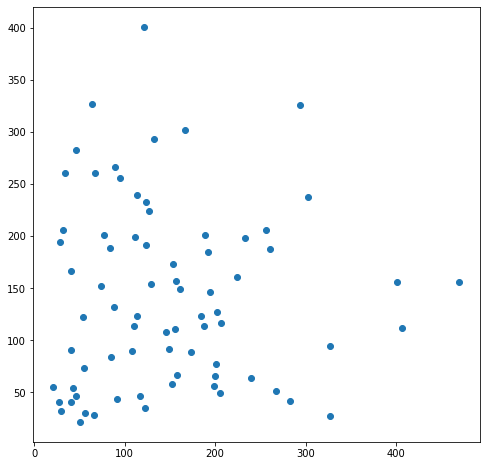

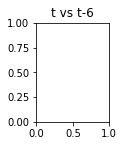

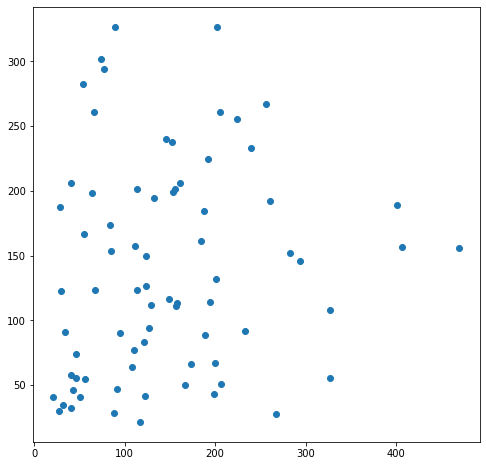

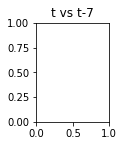

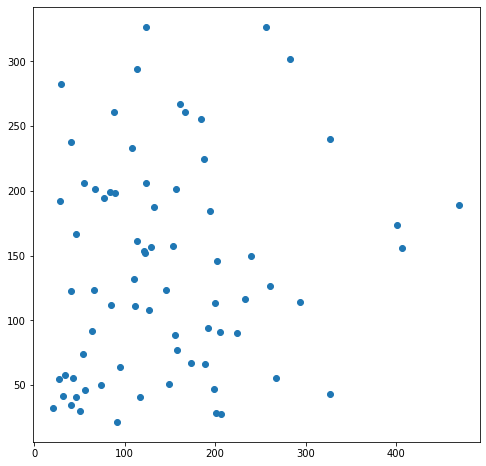

In [314]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
values = DataFrame(series)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    fig=plt.figure(figsize=(8,8))
    fig=pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
    plt.show()

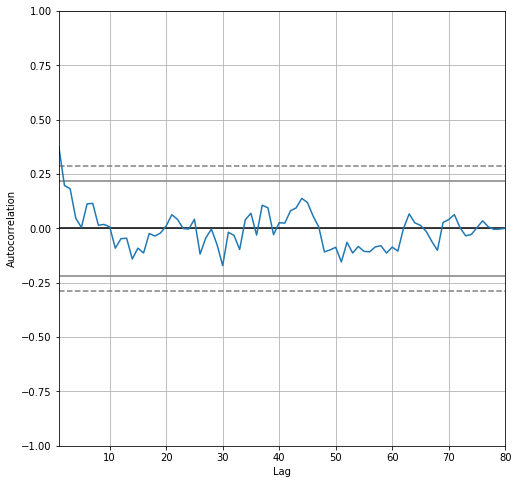

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70
2019-03-19 00:00:50,302.08
2019-03-19 00:01:00,152.25
2019-03-19 00:01:10,41.19
2019-03-19 00:01:20,34.61


In [315]:
fig=plt.figure(figsize=(8,8))
fig=autocorrelation_plot(series)
plt.show()
series.head(10)


##Autocorealtion is too less , we need some sort of noise cleaning

In [316]:
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.tail()

,feature
time,
2019-03-19 00:12:30,318.220000
2019-03-19 00:12:40,425.980000
2019-03-19 00:12:50,335.140000
2019-03-19 00:13:00,206.993333
2019-03-19 00:13:10,111.770000


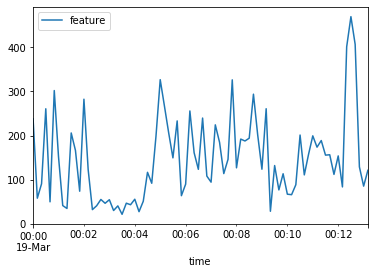

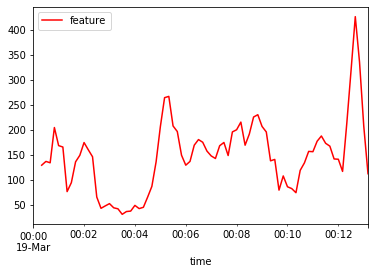

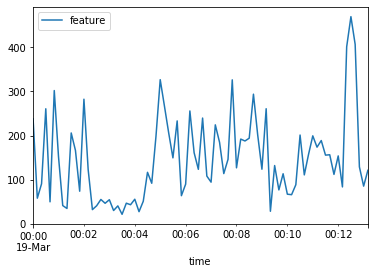

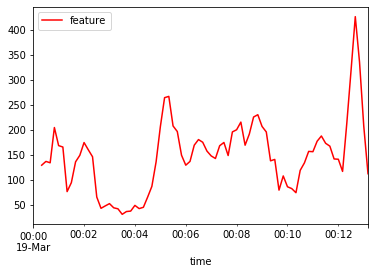

In [317]:
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
# zoomed plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()


In [318]:
roll=pd.Series(rolling_mean['feature'].values , index= rolling_mean.index)
roll

time
2019-03-19 00:00:00           NaN
2019-03-19 00:00:10           NaN
2019-03-19 00:00:20    128.810000
2019-03-19 00:00:30    136.403333
2019-03-19 00:00:40    133.660000
                          ...    
2019-03-19 00:12:30    318.220000
2019-03-19 00:12:40    425.980000
2019-03-19 00:12:50    335.140000
2019-03-19 00:13:00    206.993333
2019-03-19 00:13:10    111.770000
Length: 80, dtype: float64

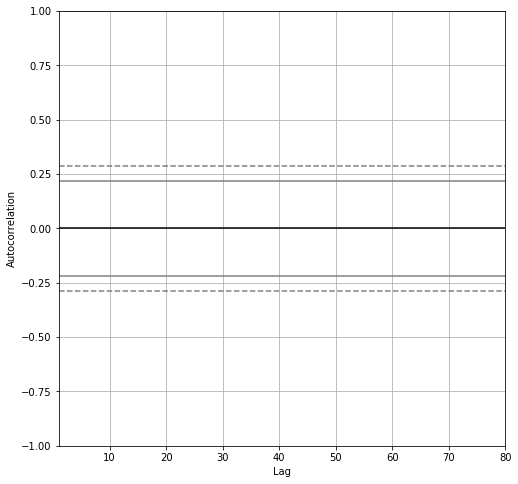

In [319]:
fig=plt.figure(figsize=(8,8))
fig=autocorrelation_plot(roll)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200D9CF8948>]],
      dtype=object)

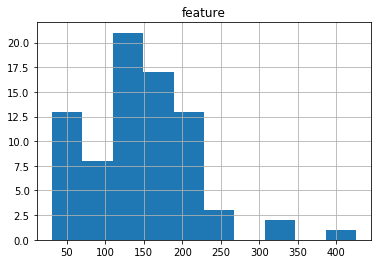

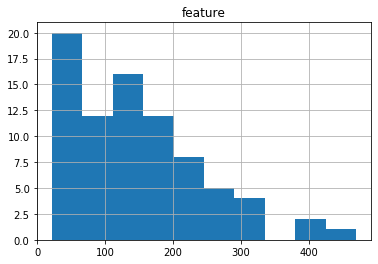

In [320]:
## fairly staionary series
rolling_mean.hist()
series.hist()

Observations: 80
Training Observations: 52
Testing Observations: 28


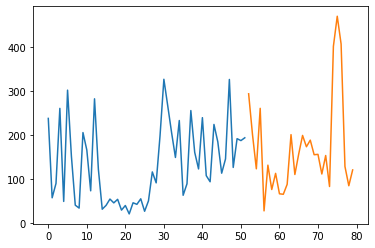

In [321]:
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
plt.show()

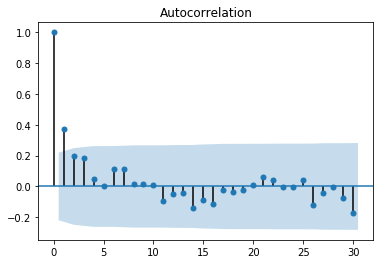

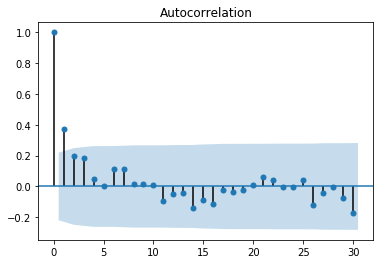

In [322]:
plot_acf(series, lags=30)


## persistance model 

Test RMSE: 97.355


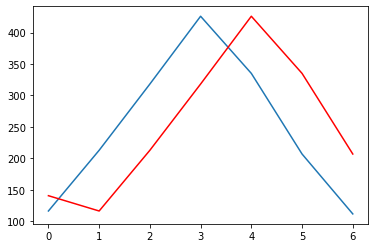

In [323]:
values = DataFrame(rolling_mean.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [324]:
rolling_mean.head()

,feature
time,
2019-03-19 00:00:00,NaN
2019-03-19 00:00:10,NaN
2019-03-19 00:00:20,128.810000
2019-03-19 00:00:30,136.403333
2019-03-19 00:00:40,133.660000


C:\Users\prakash\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Lag: 11
Coefficients: [22.341549    1.1965657  -0.04234337 -0.55292827  0.43547812 -0.26667567
 -0.05802699  0.36595966 -0.11630195 -0.32148766  0.244415   -0.04849565]
predicted=128.769837, expected=116.416667
predicted=131.261285, expected=212.923333
predicted=132.775583, expected=318.220000
predicted=133.440857, expected=425.980000
predicted=130.619927, expected=335.140000
predicted=128.214772, expected=206.993333
predicted=126.314831, expected=111.770000
Test RMSE: 158.130


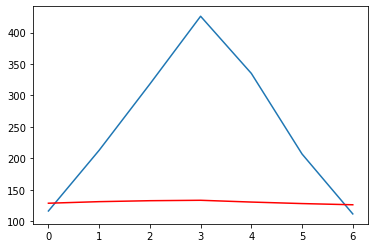

In [325]:
X = rolling_mean.dropna().values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

C:\Users\prakash\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


predicted=128.769837, expected=116.416667
predicted=116.479905, expected=212.923333
predicted=231.012665, expected=318.220000
predicted=358.709856, expected=425.980000
predicted=422.277101, expected=335.140000
predicted=296.868248, expected=206.993333
predicted=109.861845, expected=111.770000
Test RMSE: 72.956


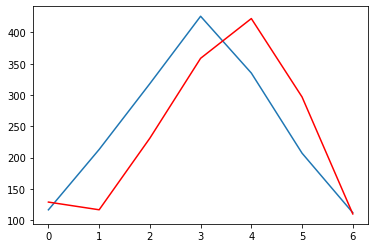

In [326]:
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

model = ARIMA(rolling_mean.dropna(), order=(5,0,0))
model_fit = model.fit()
#### summary of fit model
print(model_fit.summary())
#### line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
#### density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
#### summary stats of residuals
print(residuals.describe())

predicted=242.539138, expected=229.806667
predicted=216.720585, expected=206.350000
predicted=183.266663, expected=195.360000
predicted=182.234248, expected=137.600000
predicted=127.189564, expected=140.366667
predicted=132.564744, expected=78.986667
predicted=89.019378, expected=107.350000
predicted=99.576973, expected=85.696667
predicted=115.097489, expected=82.083333
predicted=73.521696, expected=73.790000
predicted=87.694624, expected=118.510000
predicted=129.500280, expected=133.476667
predicted=150.683630, expected=156.443333
predicted=149.694336, expected=155.843333
predicted=157.755857, expected=176.820000
predicted=170.533300, expected=187.260000
predicted=189.456959, expected=172.676667
predicted=160.149137, expected=166.923333
predicted=156.100299, expected=141.330000
predicted=137.448626, expected=140.733333
predicted=133.759742, expected=116.416667
predicted=119.864497, expected=212.923333
predicted=213.303382, expected=318.220000
predicted=357.749264, expected=425.980000


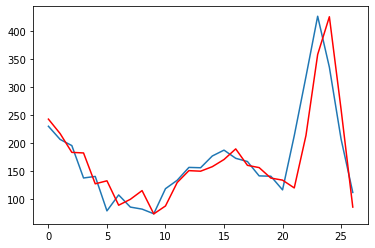

In [327]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### ideally we should iterate to find best p q r parameters. But we fist use(5,0,0) to predict future

In [341]:
dft.head()
Y=np.array(dft['time'])


predicted=131.550391
predicted=195.625493
predicted=269.725758
predicted=287.120492
predicted=267.201060
predicted=222.831144
predicted=199.826478
predicted=199.598177
predicted=222.782419
predicted=242.675548
predicted=252.378349
predicted=245.300685
predicted=234.531797
predicted=226.042691
predicted=227.383962
predicted=233.579111
predicted=241.246151
predicted=244.263367
predicted=243.581234
predicted=240.364783
predicted=238.681909
predicted=239.110811
predicted=241.799119
predicted=244.464492
predicted=246.261335
predicted=246.510040
predicted=246.263781
predicted=246.150909
predicted=246.904094
predicted=248.175108
predicted=249.636792
predicted=250.716734
predicted=251.433056
predicted=251.885307
predicted=252.440750
predicted=253.190802
predicted=254.161200
predicted=255.154794
predicted=256.075922
predicted=256.852812


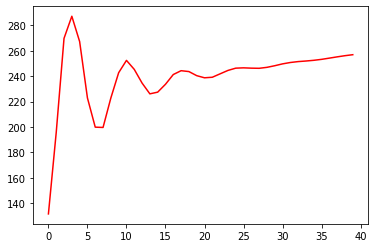

In [368]:
history = [x for x in X]
predictions = list()
# walk-forward validation
for t in range(len(Y)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
# plot forecasts against actual outcomes
pyplot.plot(predictions, color='red')
pyplot.show()

list